# **Penting**
- Jangan menambahkan import libary atau function apa pun, selain yang sudah tersedia pada cell code.
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Ingat, tugas Anda hanyalah melengkapi code yang rumpang pada bagian yang sudah ditandai "________" saja.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan juga output yang dihasilkan sesuai dengan output yang diharapkan (expected output). Sehingga Anda dapat mereview sendiri terlebih dahulu output dari cell code yang dijalankan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [43]:
# Load data

### MULAI CODE ###

url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

### SELESAI CODE ###

In [44]:
# Tampilkan 5 baris pertama dengan function head.

### MULAI CODE ###

df.head()

### SELESAI CODE ###

TransactionID AccountID  TransactionAmount PreviousTransactionDate  \
0      TX000001   AC00128              14.09     2023-04-11 16:29:14   
1      TX000002   AC00455             376.24     2023-06-27 16:44:19   
2      TX000003   AC00019             126.29     2023-07-10 18:16:08   
3      TX000004   AC00070             184.50     2023-05-05 16:32:11   
4      TX000005   AC00411              13.45     2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4          NaN            Student                198.0            1.0   

   AccountBalance     TransactionDate  
0         5112.21  2024-11-04 8:08:08  
1        13758.91  2024-11-04 8:09:35  
2         1122.35  2024-11-04 8:07:04  
3         8569.06  2024-11-04 8:09:06  
4         7429.40  2024-11-04 8:06:39

### **Output yang diharapkan:**

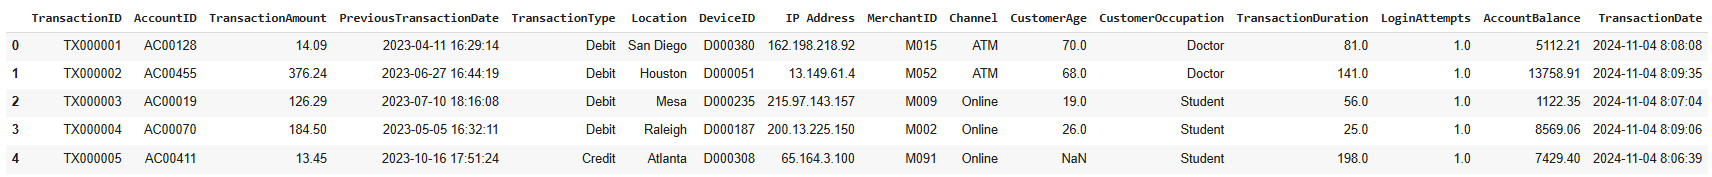

In [45]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

### MULAI CODE ###

df.info()

### SELESAI CODE ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

### **Output yang diharapkan:**

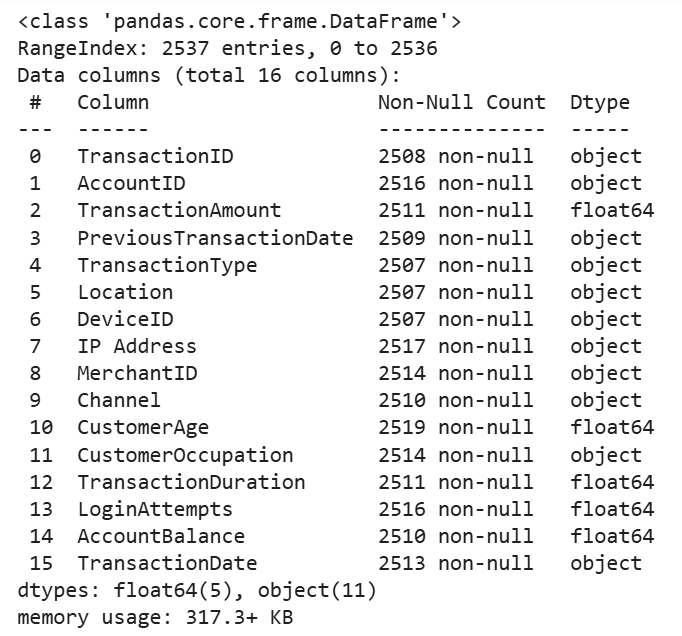

In [46]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

### MULAI CODE ###

df.describe(include='all')

### SELESAI CODE ###

TransactionID AccountID  TransactionAmount PreviousTransactionDate  \
count           2508      2516        2511.000000                    2509   
unique          2484       495                NaN                    2485   
top         TX001046   AC00362                NaN     2023-05-10 16:27:51   
freq               2        12                NaN                       2   
mean             NaN       NaN         297.656468                     NaN   
std              NaN       NaN         292.230367                     NaN   
min              NaN       NaN           0.260000                     NaN   
25%              NaN       NaN          81.310000                     NaN   
50%              NaN       NaN         211.360000                     NaN   
75%              NaN       NaN         413.105000                     NaN   
max              NaN       NaN        1919.110000                     NaN   

       TransactionType    Location DeviceID      IP Address MerchantID  \
count             2507        2507     2507            2517       2514   
unique               2          43      681             591        100   
top              Debit  Fort Worth  D000697  200.136.146.93       M026   
freq              1942          71        9              12         46   
mean               NaN         NaN      NaN             NaN        NaN   
std                NaN         NaN      NaN             NaN        NaN   
min                NaN         NaN      NaN             NaN        NaN   
25%                NaN         NaN      NaN             NaN        NaN   
50%                NaN         NaN      NaN             NaN        NaN   
75%                NaN         NaN      NaN             NaN        NaN   
max                NaN         NaN      NaN             NaN        NaN   

       Channel  CustomerAge CustomerOccupation  TransactionDuration  \
count     2510  2519.000000               2514          2511.000000   
unique       3          NaN                  4                  NaN   
top     Branch          NaN            Student                  NaN   
freq       868          NaN                657                  NaN   
mean       NaN    44.678444                NaN           119.422939   
std        NaN    17.837359                NaN            70.078513   
min        NaN    18.000000                NaN            10.000000   
25%        NaN    27.000000                NaN            63.000000   
50%        NaN    45.000000                NaN           112.000000   
75%        NaN    59.000000                NaN           161.000000   
max        NaN    80.000000                NaN           300.000000   

        LoginAttempts  AccountBalance     TransactionDate  
count     2516.000000     2510.000000                2513  
unique            NaN             NaN                 360  
top               NaN             NaN  2024-11-04 8:09:17  
freq              NaN             NaN                  18  
mean         1.121622     5113.438124                 NaN  
std          0.594469     3897.975861                 NaN  
min          1.000000      101.250000                 NaN  
25%          1.000000     1504.727500                 NaN  
50%          1.000000     4734.110000                 NaN  
75%          1.000000     7672.687500                 NaN  
max          5.000000    14977.990000                 NaN

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

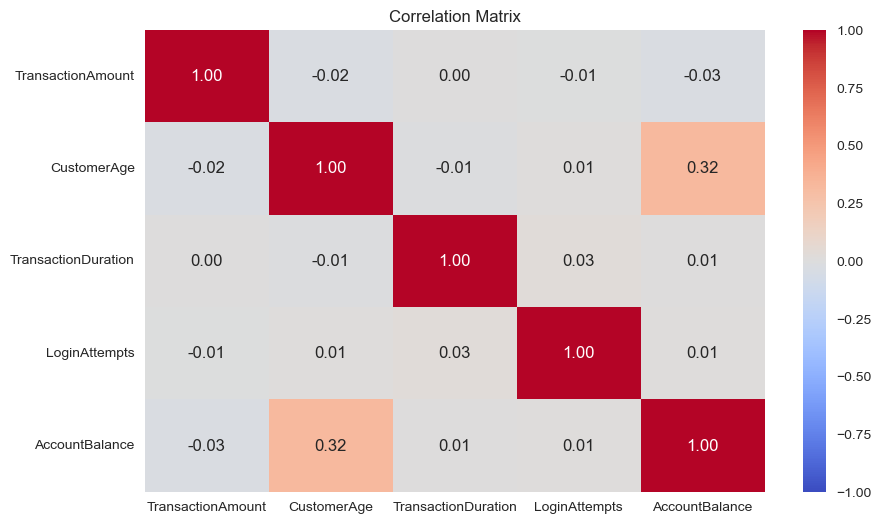

In [47]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

# Memilih kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns

### MULAI CODE ###

# Hitung matriks korelasi
correlation = df[numerical_cols].corr()

# Buat visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               vmin=-1,
               vmax=1)
plt.title('Correlation Matrix')
plt.show()

### SELESAI CODE ###

## **Output yang diharapkan:**

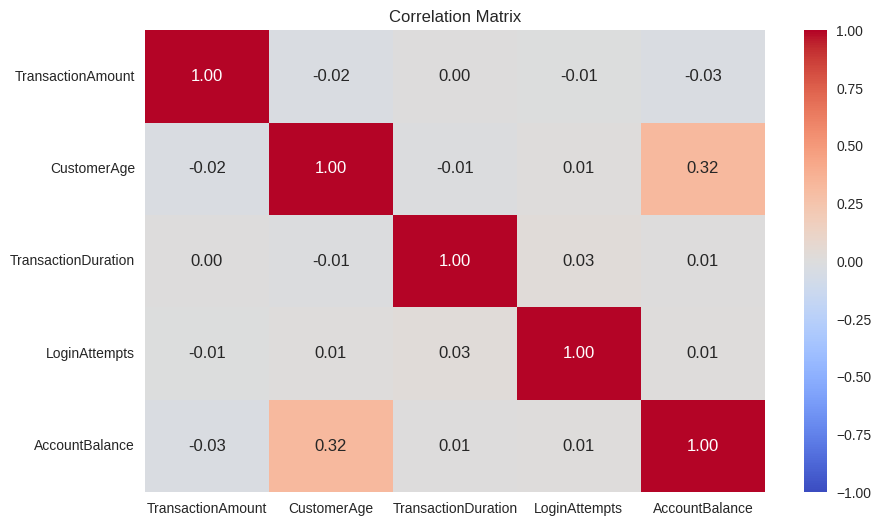

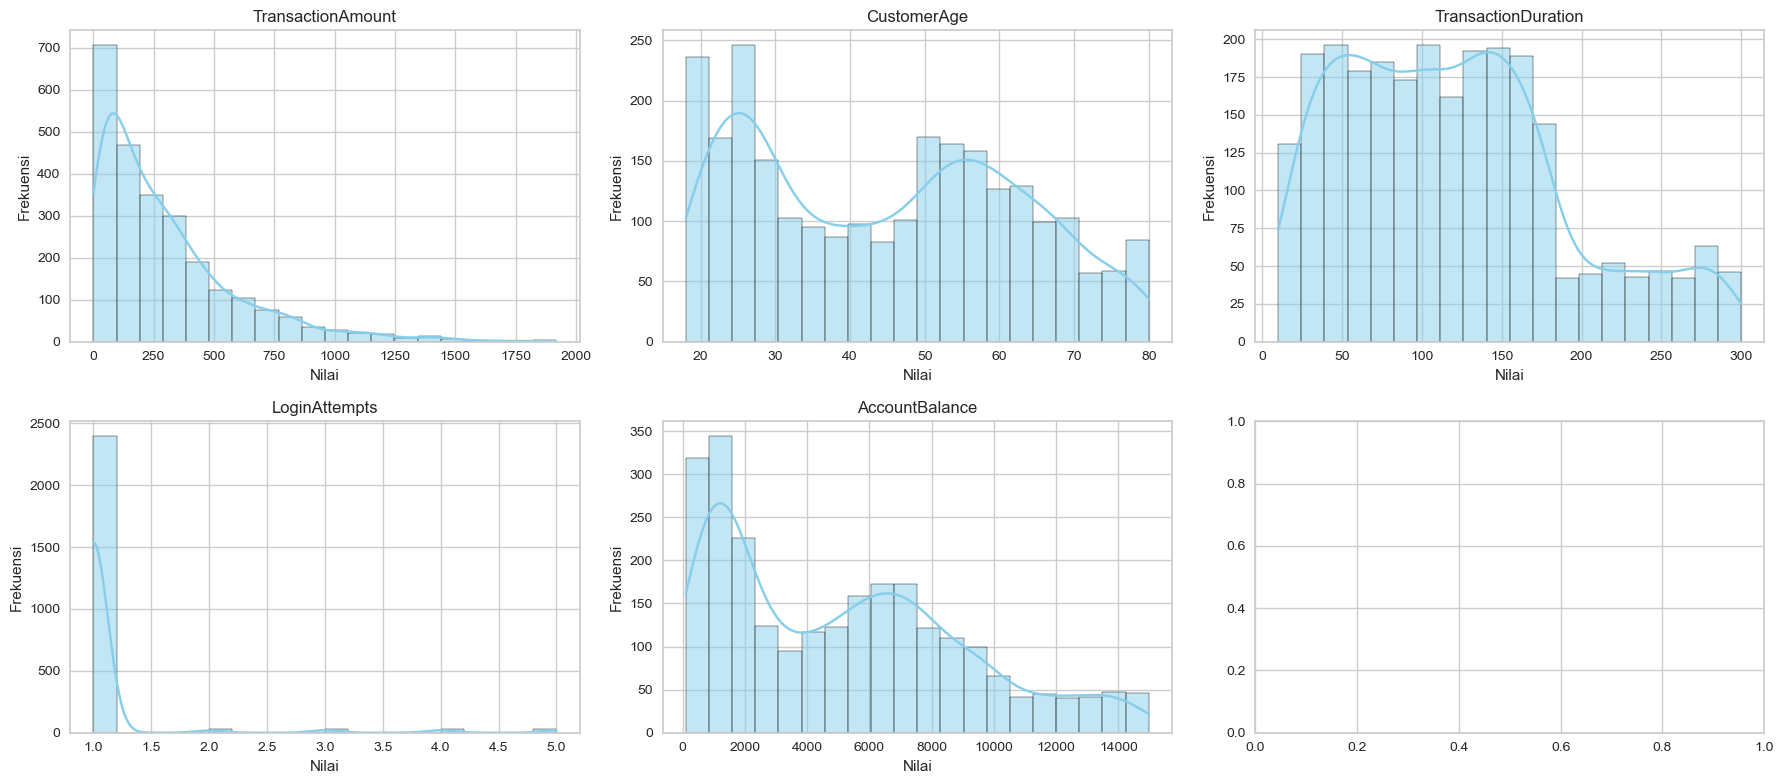

In [48]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_cols):

    ### MULAI CODE ###

    # Tampilkan histogram dan pastikan plot ditempatkan di subplot (axes) yang benar
    sns.histplot(df[column], bins=20, kde=True, color='skyblue', ax=axes[i])

    # Atur judul dan label
    axes[i].set_title(column)
    axes[i].set_xlabel("Nilai")
    axes[i].set_ylabel("Frekuensi")

    ### SELESAI CODE ###

plt.tight_layout()
plt.show()

## **Output yang diharapkan:**

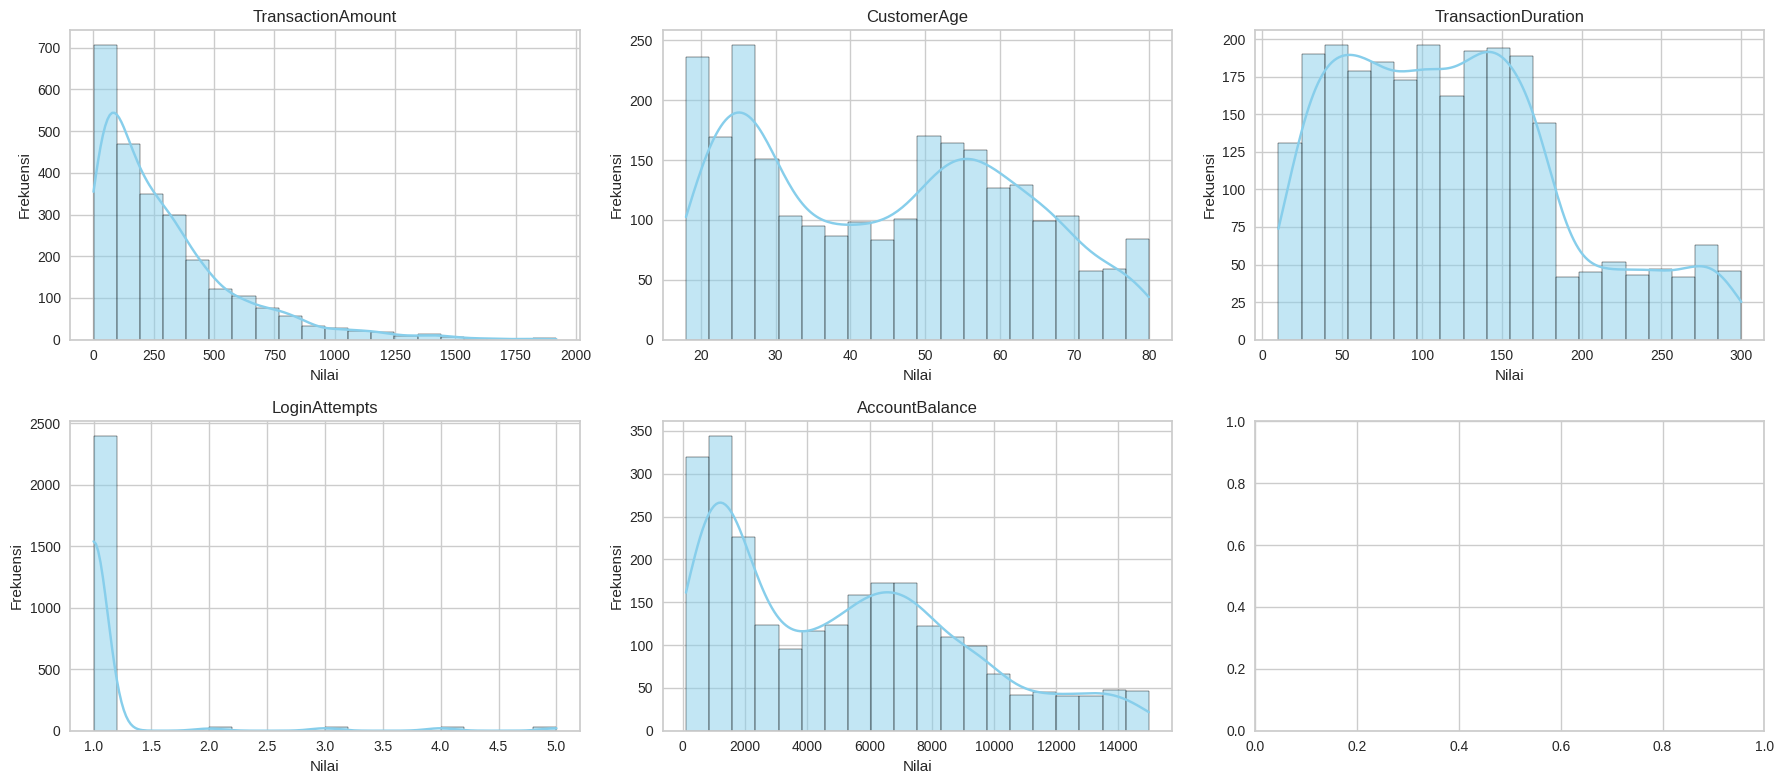

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

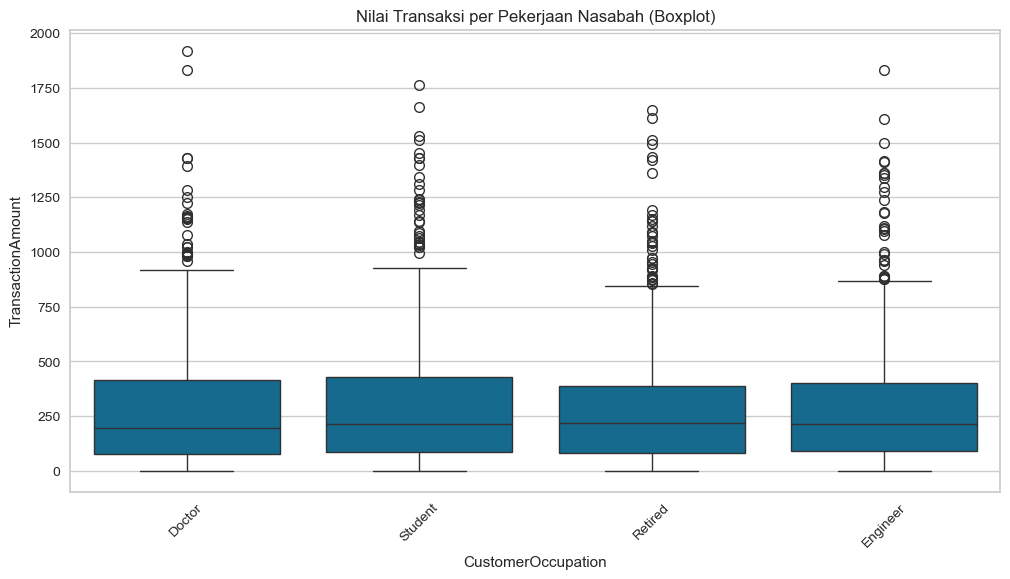

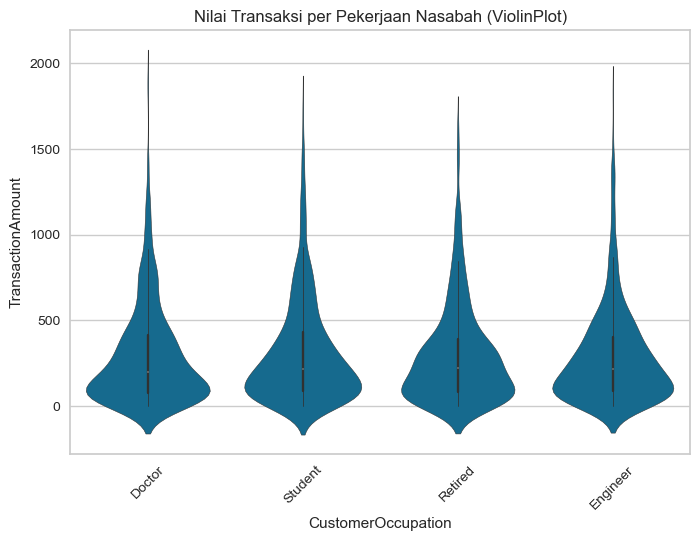

In [49]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

### MULAI CODE ###

plt.figure(figsize=(12, 6))

# Buat visualisasi boxplot untuk melihat sebaran 'TransactionAmount' (y) berdasarkan 'CustomerOccupation' (x)
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df)

plt.title("Nilai Transaksi per Pekerjaan Nasabah (Boxplot)")

# Putar label sumbu-x agar tidak tumpang tindih
plt.xticks(rotation=45)

plt.show()

### SELESAI CODE ###

# -----------------------------------------------------------------
# (TANTANGAN OPSIONAL)
# -----------------------------------------------------------------
# Sekarang, bagaimana jika kita juga ingin melihat kepadatan distribusi data di setiap kategori?
# Coba buat visualisasi lain di bawah ini, misalnya 'violinplot' (sns.violinplot) dengan parameter yang sama.
sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df)

plt.title("Nilai Transaksi per Pekerjaan Nasabah (ViolinPlot)")

plt.xticks(rotation=45)

plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan drop pada data null/nan dan data yang duplicate
3. Melakukan drop pada seluruh kolom id, address, dan date.
4. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [50]:
# Mengecek dataset menggunakan isnull().sum()

### MULAI CODE ###

df.isnull().sum()


### SELESAI CODE ###

TransactionID              29
AccountID                  21
TransactionAmount          26
PreviousTransactionDate    28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
TransactionDate            24
dtype: int64

## **Output yang diharapkan:**

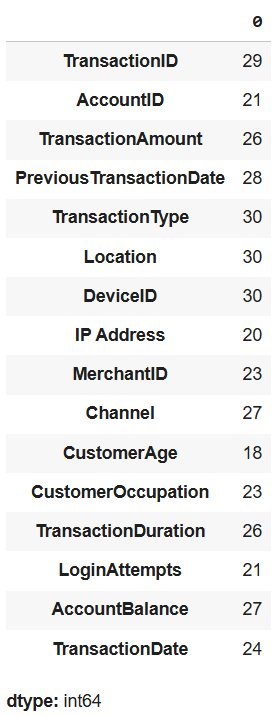

In [51]:
# Mengecek dataset menggunakan duplicated().sum()

### MULAI CODE ###

df.duplicated().sum()

### SELESAI CODE ###

np.int64(21)

## **Output yang diharapkan:**

### np.int64(21)

In [52]:
# Menangani data yang hilang.

### MULAI CODE ###

# Panggil fungsi untuk menghapus baris yang hilang dan pastikan agar perubahan disimpan kembali ke 'df'
df.dropna(inplace=True)

# Cek kembali dataset menggunakan isnull().sum()
df.isnull().sum()

### SELESAI CODE ###

TransactionID              0
AccountID                  0
TransactionAmount          0
PreviousTransactionDate    0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
TransactionDate            0
dtype: int64

## **Output yang diharapkan:**

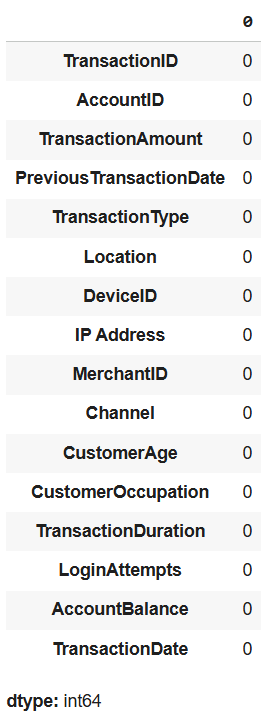

In [53]:
# Menghapus data duplikat.

### MULAI CODE ###

# Panggil fungsi untuk menghapus baris duplikat dan pastikan agar perubahan disimpan kembali ke 'df'
df.drop_duplicates(inplace=True)

# Cek kembali dataset menggunakan duplicated().sum()
df.duplicated().sum()

### SELESAI CODE ###

np.int64(0)

## **Output yang diharapkan:**

### np.int64(0)

In [54]:
# Melakukan drop pada kolom yang memiliki keterangan Date, id, dan IP Address

### MULAI CODE ###

# Buat list comprehension untuk memfilter nama kolom.
#    - Iterasi melalui semua nama kolom (col).
#    - Cek apakah 'id', 'ip', atau 'date' ada di nama kolom.
#    - Gunakan .lower() untuk membuat perbandingan case-insensitive (mengabaikan besar/kecil).

cols_to_drop = [col for col in df.columns if
                'id' in col.lower() or
                'ip' in col.lower() or
                'date' in col.lower()]

# Gunakan fungsi .drop() untuk menghapus kolom-kolom yang ada di 'cols_to_drop'.
df = df.drop(columns=cols_to_drop)

# Tampilkan 5 baris pertama untuk memverifikasi
df.head()

### SELESAI CODE ###

TransactionAmount TransactionType       Location Channel  CustomerAge  \
0              14.09           Debit      San Diego     ATM         70.0   
1             376.24           Debit        Houston     ATM         68.0   
2             126.29           Debit           Mesa  Online         19.0   
3             184.50           Debit        Raleigh  Online         26.0   
5              92.15           Debit  Oklahoma City     ATM         18.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor                 81.0            1.0         5112.21  
1             Doctor                141.0            1.0        13758.91  
2            Student                 56.0            1.0         1122.35  
3            Student                 25.0            1.0         8569.06  
5            Student                172.0            1.0          781.68

## **Output yang diharapkan:**

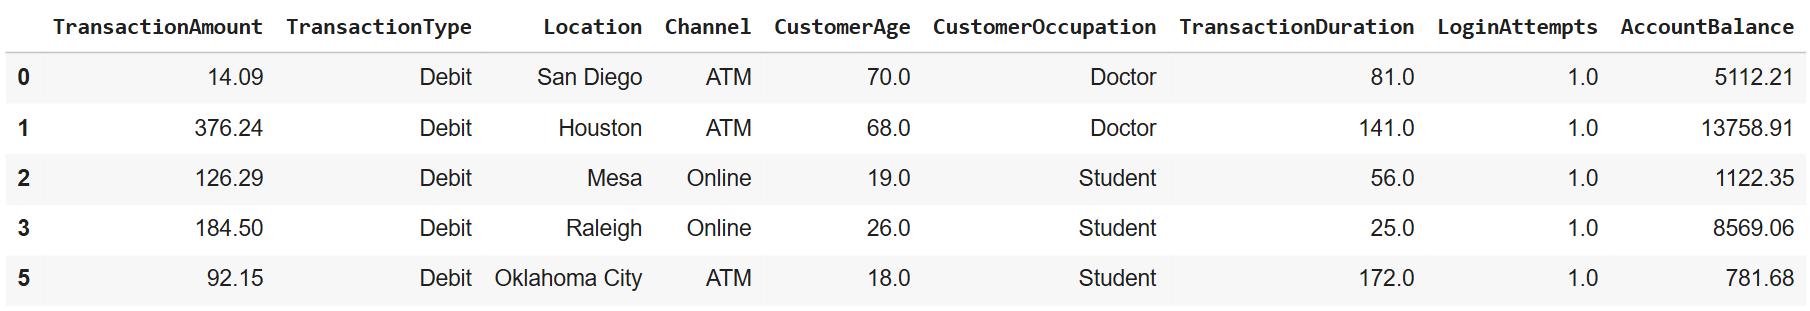

In [55]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

### MULAI CODE ###

# Pilih semua kolom yang bertipe 'object' (kategorikal)
categorical_cols = list(df.select_dtypes(include=['object']).columns)

encoders = {}

# Loop melalui setiap kolom kategorikal
for column in categorical_cols:
    # Buat (instantiate) objek LabelEncoder
    label_encoder = LabelEncoder()

    # Terapkan (fit) encoder ke data dan sekaligus ubah (transform) data tersebut
    df[column] = label_encoder.fit_transform(df[column])

    # Simpan encoder
    encoders[column] = label_encoder

# Tampilkan 5 baris pertama untuk memverifikasi hasil encoding
df.head()

### SELESAI CODE ###

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09                1        36        0         70.0   
1             376.24                1        15        0         68.0   
2             126.29                1        23        2         19.0   
3             184.50                1        33        2         26.0   
5              92.15                1        28        0         18.0   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0                   0                 81.0            1.0         5112.21  
1                   0                141.0            1.0        13758.91  
2                   3                 56.0            1.0         1122.35  
3                   3                 25.0            1.0         8569.06  
5                   3                172.0            1.0          781.68

## **Output yang diharapkan:**

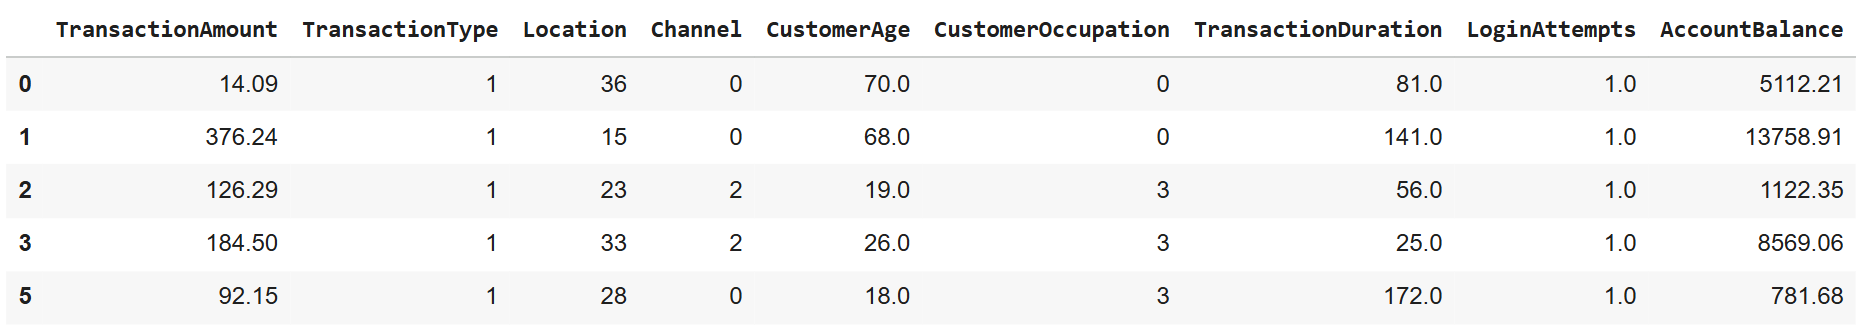

In [56]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.

### MULAI CODE ###

df.columns.tolist()

### SELESAI CODE ###

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

## **Output yang diharapkan:**

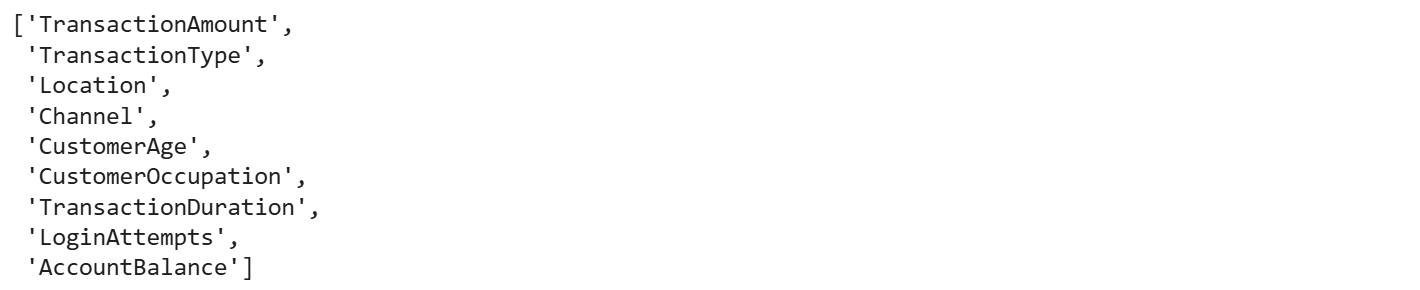

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [57]:
# Melakukan Handling Outlier Data menggunakan metode drop.

for col in numerical_cols:

    ### MULAI CODE ###

    # Hitung Kuartil 1 (Q1) dan Kuartil 3 (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Hitung Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Tentukan batas bawah (lower bound) dan batas atas (upper bound)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter DataFrame: Simpan hanya baris di mana nilai 'df[col]' berada DI ANTARA (inklusif) batas bawah dan batas atas.
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    ### SELESAI CODE ###

# Tampilkan statistik deskriptif setelah outlier dihapus
df.describe()

TransactionAmount  TransactionType     Location      Channel  \
count        1945.000000      1945.000000  1945.000000  1945.000000   
mean          256.838278         0.771722    21.299743     0.977378   
std           218.370197         0.419830    12.329250     0.804119   
min             0.260000         0.000000     0.000000     0.000000   
25%            78.920000         1.000000    11.000000     0.000000   
50%           199.700000         1.000000    21.000000     1.000000   
75%           374.500000         1.000000    32.000000     2.000000   
max           903.190000         1.000000    42.000000     2.000000   

       CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
count  1945.000000         1945.000000          1945.000000         1945.0   
mean     44.693059            1.503342           119.225193            1.0   
std      17.743453            1.135888            70.600647            0.0   
min      18.000000            0.000000            10.000000            1.0   
25%      27.000000            0.000000            63.000000            1.0   
50%      45.000000            1.000000           111.000000            1.0   
75%      59.000000            3.000000           162.000000            1.0   
max      80.000000            3.000000           300.000000            1.0   

       AccountBalance  
count     1945.000000  
mean      5100.811913  
std       3907.153333  
min        102.200000  
25%       1488.650000  
50%       4693.600000  
75%       7659.990000  
max      14977.990000

## **Output yang diharapkan:**

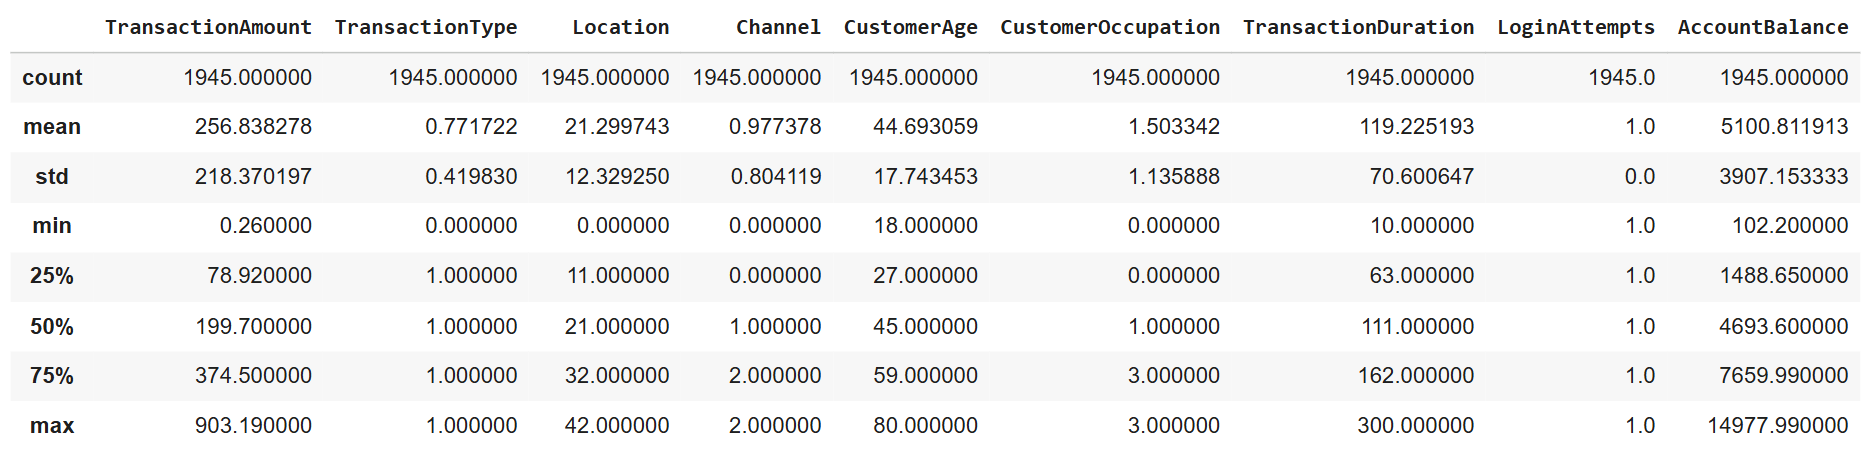

In [58]:
# Melakukan feature scaling menggunakan StandardScaler() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

### MULAI CODE ###

# Buat (instantiate) StandardScaler
scaler = StandardScaler()

# Terapkan (fit) scaler ke data dan sekaligus ubah (transform) data tersebut
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasil scaling
df.head()

### SELESAI CODE ###

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -1.111922                1        36        0     1.426636   
1           0.546926                1        15        0     1.313889   
2          -0.597984                1        23        2    -1.448403   
3          -0.331350                1        33        2    -1.053790   
5          -0.754364                1        28        0    -1.504776   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0                   0            -0.541568            0.0        0.002918  
1                   0             0.308502            0.0        2.216531  
2                   3            -0.895763            0.0       -1.018513  
3                   3            -1.334965            0.0        0.887895  
5                   3             0.747704            0.0       -1.105726

## **Output yang diharapkan:**

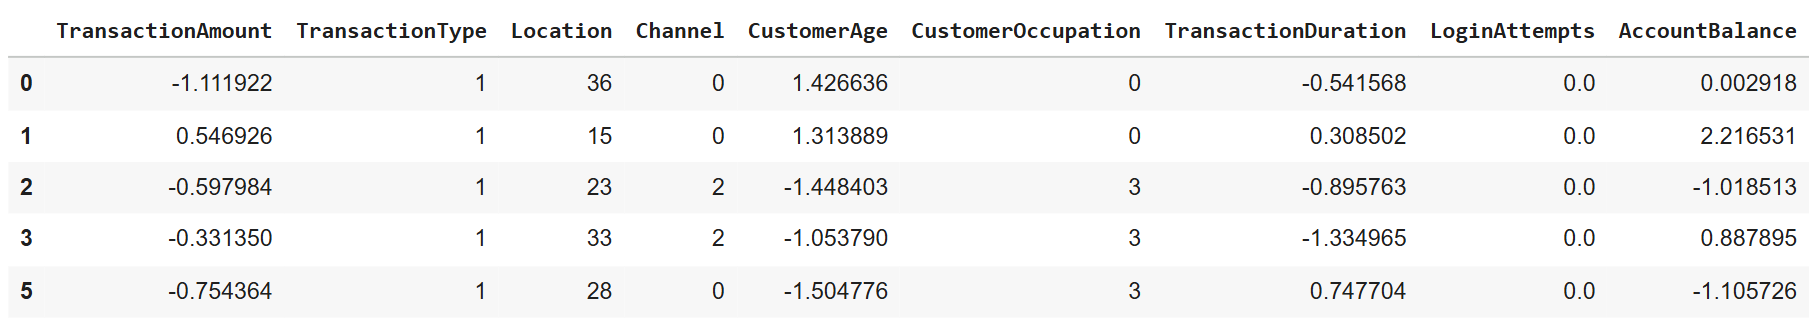

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [59]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

### MULAI CODE ###

# Tentukan kolom numerik yang ingin Anda kelompokkan
col_to_bin = 'CustomerAge'  # (Isi dengan 'CustomerAge' atau kolom numerik lain)

# Tentukan nama untuk kolom kategori baru
new_col_name = 'CustomerAgeGroup'

# Tentukan label untuk 3 grup (Anda dapat menentukan nama label-nya sendiri)
# Mulai dari rendah --> sedang --> tinggi
bin_labels = ['Muda', 'Dewasa', 'Lansia']

# Gunakan 'pd.qcut' untuk membagi data menjadi 3 kelompok
df[new_col_name] = pd.qcut(df[col_to_bin], q=3, labels=bin_labels, duplicates='drop')

# Lakukan Label Encoding pada kolom baru ini agar menjadi numerik
label_encoder = LabelEncoder()
df[new_col_name] = label_encoder.fit_transform(df[new_col_name])

# Simpan encoder dan tambahkan nama kolom baru ke 'categorical_cols'
encoders[new_col_name] = label_encoder
categorical_cols.extend([new_col_name])

# Tampilkan 5 baris pertama untuk memverifikasi
df.head()

### SELESAI CODE ###

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -1.111922                1        36        0     1.426636   
1           0.546926                1        15        0     1.313889   
2          -0.597984                1        23        2    -1.448403   
3          -0.331350                1        33        2    -1.053790   
5          -0.754364                1        28        0    -1.504776   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0            -0.541568            0.0        0.002918   
1                   0             0.308502            0.0        2.216531   
2                   3            -0.895763            0.0       -1.018513   
3                   3            -1.334965            0.0        0.887895   
5                   3             0.747704            0.0       -1.105726   

   CustomerAgeGroup  
0                 1  
1                 1  
2                 2  
3                 2  
5                 2

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [60]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.

### MULAI CODE ###

# Buat salinan (copy) dari 'df' ke variabel 'df_used'
df_used = df.copy()

# Tampilkan ringkasan statistik dari DataFrame 'df'
df_used.describe(include='all')

### SELESAI CODE ###

TransactionAmount  TransactionType     Location      Channel  \
count       1.945000e+03      1945.000000  1945.000000  1945.000000   
mean       -8.402305e-17         0.771722    21.299743     0.977378   
std         1.000257e+00         0.419830    12.329250     0.804119   
min        -1.175271e+00         0.000000     0.000000     0.000000   
25%        -8.149648e-01         1.000000    11.000000     0.000000   
50%        -2.617251e-01         1.000000    21.000000     1.000000   
75%         5.389562e-01         1.000000    32.000000     2.000000   
max         2.960651e+00         1.000000    42.000000     2.000000   

        CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
count  1.945000e+03         1945.000000         1.945000e+03         1945.0   
mean  -1.269479e-16            1.503342         2.557223e-17            0.0   
std    1.000257e+00            1.135888         1.000257e+00            0.0   
min   -1.504776e+00            0.000000        -1.547483e+00            0.0   
25%   -9.974163e-01            0.000000        -7.965883e-01            0.0   
50%    1.730327e-02            1.000000        -1.165330e-01            0.0   
75%    8.065296e-01            3.000000         6.060257e-01            0.0   
max    1.990369e+00            3.000000         2.561185e+00            0.0   

       AccountBalance  CustomerAgeGroup  
count    1.945000e+03       1945.000000  
mean    -6.027740e-17          1.015424  
std      1.000257e+00          0.820123  
min     -1.279678e+00          0.000000  
25%     -9.247374e-01          0.000000  
50%     -1.042490e-01          1.000000  
75%      6.551666e-01          2.000000  
max      2.528623e+00          2.000000

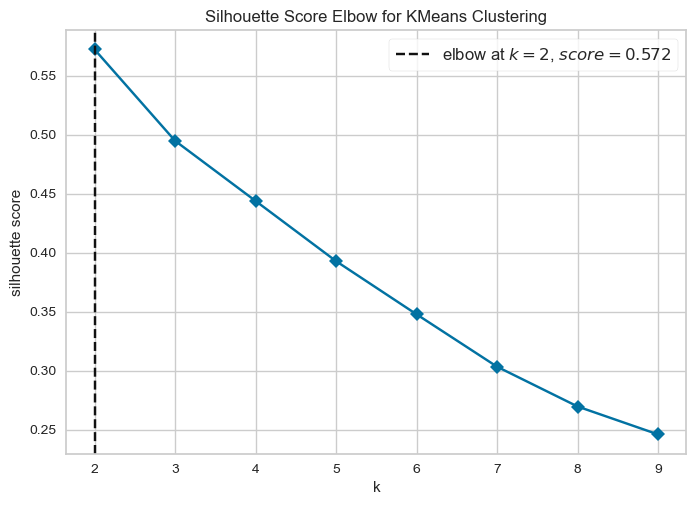

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [66]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Buat (instantiate) model clustering
model = KMeans()

### MULAI CODE ###

# Buat (instantiate) KElbowVisualizer
#  - Masukkan 'model' yang akan digunakan
#  - Tentukan jumlah cluster yang akan diuji (range 2 sampai 10)
#  - Tentukan 'metric' evaluasi
visualizer = KElbowVisualizer(model,
                       k=(2,10),
                       metric='silhouette',
                       timings=False)

# Jalankan (fit) visualizer pada data
visualizer.fit(df)

# Tampilkan plot
visualizer.show()

### SELESAI CODE ###

## **Output yang diharapkan** (bisa saja sedikit berbeda)**:**

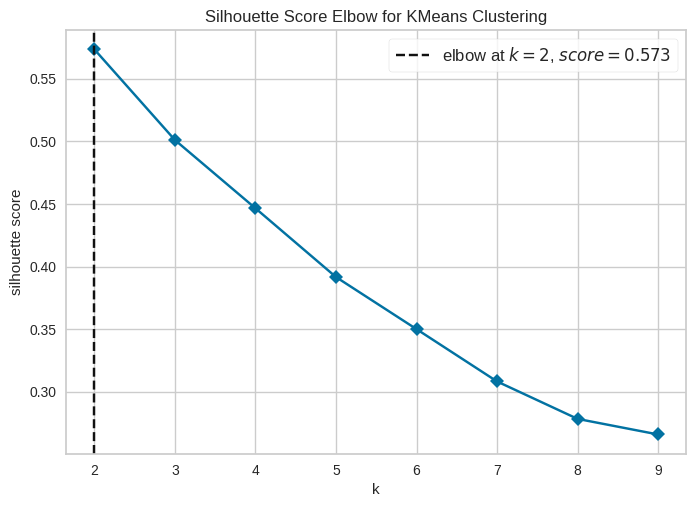

In [63]:
# Menggunakan algoritma K-Means Clustering

### MULAI CODE ###

# Buat (instantiate) objek model KMeans
#  - Tentukan jumlah cluster (n_clusters)
model = KMeans(n_clusters=3, random_state=42)

# Latih (fit) model dengan data Anda (df)
model.fit(df)

### SELESAI CODE ###

KMeans(n_clusters=3, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [64]:
# Menyimpan model menggunakan joblib

### MULAI CODE ###

# Simpan model clustering yang sudah dilatih
joblib.dump(model, "model_clustering.h5")

### SELESAI CODE ###

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [67]:
# Menghitung dan menampilkan nilai Silhouette Score.

### MULAI CODE ###

# Dapatkan hasil (label) cluster dari model 'kmeans' yang telah di-fit

labels = model.labels_

# Panggil fungsi untuk menghitung silhouette score
score = silhouette_score(df, labels)

# Cetak skornya
print("Silhouette Score:", score)

### SELESAI CODE ###

Silhouette Score: 0.24600408604686508


C:\Users\Azrxr\AppData\Local\Temp\ipykernel_19460\2338310631.py:19: UserWarning: 
The palette list has fewer values (2) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
c:\Users\Azrxr\anaconda3\envs\dicoding-ml\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


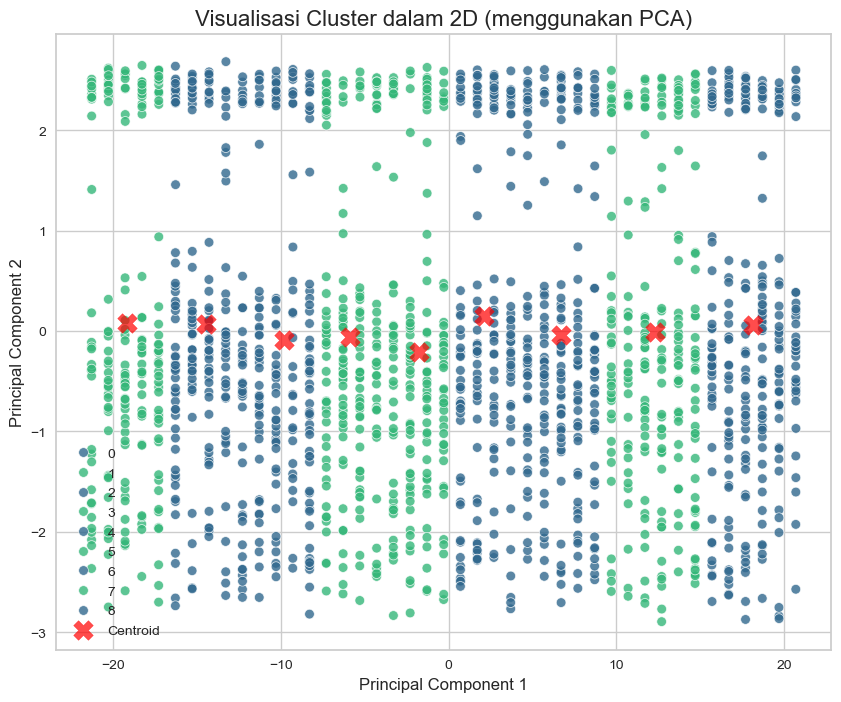

In [73]:
# Membuat visualisasi hasil clustering

### MULAI CODE ###

# Buat (instantiate) objek PCA untuk 2 komponen (n_components=2)
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df' dan transformasikan data tersebut
df_pca = pca.fit_transform(df)

# Buat DataFrame baru 'df_pca' dari hasil transformasi
df_pca = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Tambahkan kolom 'Cluster' ke 'df_pca' menggunakan 'labels'(variabel dari hasil 'kmeans.labels_' sebelumnya)
df_pca['Cluster'] = labels

# Buat scatter plot menggunakan Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',  # Warnai titik berdasarkan kolom 'Cluster'
    palette=sns.color_palette("viridis", n_colors=2),
    data=df_pca,
    legend="full",
    alpha=0.8
)
### SELESAI CODE ###

plt.title('Visualisasi Cluster dalam 2D (menggunakan PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
centers = pca.transform(model.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroid')
plt.legend()
plt.show()

## **Output yang diharapkan** (bisa saja sedikit berbeda)**:**

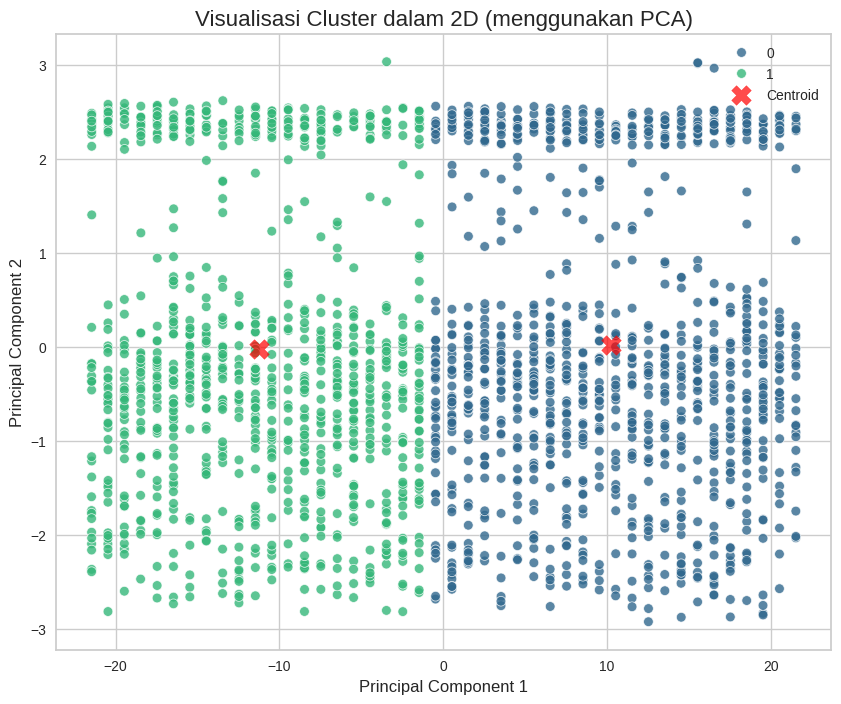

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [74]:
# Membangun model menggunakan PCA.

### MULAI CODE ###

# Buat (instantiate) objek PCA dengan 2 komponen
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df_used' dan transformasikan data tersebut
df_pca_array = pca.fit_transform(df_used)

# Buat DataFrame baru 'data_final' dari hasil array PCA
data_final = pd.DataFrame(data=df_pca_array, columns=['PCA1', 'PCA2'])

# Buat (instantiate) model KMeans BARU
kmeans_pca = KMeans(n_clusters=3, random_state=42)

# Latih (fit) model KMeans BARU ini HANYA pada 'data_final'
kmeans_pca.fit(data_final)

### SELESAI CODE ###

KMeans(n_clusters=3, random_state=42)

In [75]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")

### MULAI CODE ###

# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

### SELESAI CODE ###

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Transaction Amount:** -0.01
  - **Rata-rata (mean) Customer Age:** 0.32
  - **Analisis:** Cluster ini mencakup pelanggan usia lanjut usia dengan jumlah transaksi yang dilakukan cukup rendah. Pelanggan dalam cluster ini cenderung memiliki daya beli yang rendah dan cenderung bermain aman. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan dengan resiko rendah.


In [76]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

### MULAI CODE ###

# Tambahkan kolom 'Cluster' baru berupa 'labels' (variabel dari 'kmeans.labels_' sebelumnya)
df_used['Cluster'] = labels

# Kelompokkan (groupby) 'df_used' berdasarkan 'Cluster' dan hitung agregasi untuk 'numerical_cols'.
agg_summary = df_used.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Tampilkan hasil ringkasan
display(agg_summary)

### SELESAI CODE ###

Cluster                      0     1     2     3     4     5     6     7     8
TransactionAmount   mean  0.02  0.00  0.03 -0.06  0.04  0.03 -0.05 -0.05  0.03
                    min  -1.17 -1.17 -1.16 -1.17 -1.17 -1.15 -1.18 -1.17 -1.17
                    max   2.96  2.89  2.50  2.68  2.90  2.79  2.75  2.90  2.93
CustomerAge         mean -0.05 -0.00  0.02  0.01 -0.13  0.10  0.06 -0.02  0.05
                    min  -1.50 -1.50 -1.50 -1.50 -1.50 -1.50 -1.50 -1.50 -1.50
                    max   1.99  1.99  1.99  1.99  1.99  1.99  1.99  1.99  1.93
TransactionDuration mean -0.05 -0.03  0.04  0.05 -0.07  0.16 -0.02 -0.02 -0.00
                    min  -1.52 -1.52 -1.55 -1.55 -1.55 -1.52 -1.52 -1.55 -1.55
                    max   2.46  2.45  2.35  2.56  2.50  2.52  2.55  2.55  2.52
LoginAttempts       mean  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
                    min   0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
                    max   0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
AccountBalance      mean  0.03 -0.00 -0.09 -0.02 -0.02 -0.03  0.05  0.07  0.01
                    min  -1.28 -1.27 -1.28 -1.27 -1.28 -1.27 -1.27 -1.27 -1.27
                    max   2.52  2.50  2.45  2.52  2.53  2.37  2.40  2.48  2.41

# **⚠️PERHATIAN: JAWAB DI BAWAH SINI**
## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya sebelum **Inverse** (masih dalam kondisi **Scaled**).
1. **CLUSTER 1: (Nasabah Transaksi Rata-rata dan Usia Rata-rata)**:
  - **Rata-rata (mean) TransactionAmount:** 0.00 (scaled) → setara dengan rata-rata populasi (belum inverse) <Setelah inverse>  
  - **Rata-rata CustomerAge:** -0.00 (scaled) → usia mendekati rata-rata populasi  
  - **Rata-rata TransactionDuration:** -0.03 (scaled) → durasi transaksi sedikit lebih rendah dari rata-rata
  - **Analisis:** Cluster ini merepresentasikan nasabah dengan karakteristik yang mendekati rata-rata populasi, baik dari sisi nilai transaksi maupun usia. Aktivitas transaksi yang dilakukan relatif stabil dan tidak menunjukkan kecenderungan ekstrem. Nasabah dalam cluster ini cocok untuk ditargetkan dengan produk perbankan umum seperti tabungan reguler atau layanan transaksi standar.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [77]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

### MULAI CODE ###

df_used.rename(columns={"Cluster": "Target"}, inplace=True)

# Tampilkan 5 baris pertama untuk memverifikasi
df_used.head()

### SELESAI CODE ###

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -1.111922                1        36        0     1.426636   
1           0.546926                1        15        0     1.313889   
2          -0.597984                1        23        2    -1.448403   
3          -0.331350                1        33        2    -1.053790   
5          -0.754364                1        28        0    -1.504776   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0            -0.541568            0.0        0.002918   
1                   0             0.308502            0.0        2.216531   
2                   3            -0.895763            0.0       -1.018513   
3                   3            -1.334965            0.0        0.887895   
5                   3             0.747704            0.0       -1.105726   

   CustomerAgeGroup  Target  
0                 1       1  
1                 1       5  
2                 2       2  
3                 2       1  
5                 2       6

In [78]:
# Simpan Data

### MULAI CODE ###

df_used.to_csv('data_clustering.csv', index=False)

### SELESAI CODE ###

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [79]:
# inverse dataset ke rentang normal untuk numerikal

df_inverse = df_used.copy()

### MULAI CODE ###

# Gunakan 'scaler' untuk mengembalikan 'numerical_cols' ke nilai aslinya.
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

### SELESAI CODE ###

TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              14.09                1        36        0         70.0   
1             376.24                1        15        0         68.0   
2             126.29                1        23        2         19.0   
3             184.50                1        33        2         26.0   
5              92.15                1        28        0         18.0   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0                 81.0            1.0         5112.21   
1                   0                141.0            1.0        13758.91   
2                   3                 56.0            1.0         1122.35   
3                   3                 25.0            1.0         8569.06   
5                   3                172.0            1.0          781.68   

   CustomerAgeGroup  Target  
0                 1       1  
1                 1       5  
2                 2       2  
3                 2       1  
5                 2       6

In [81]:
# inverse dataset yang sudah diencode ke kategori aslinya.

### MULAI CODE ###

for column in categorical_cols:
    # Ambil encoder yang tepat untuk 'column' dari dictionary 'encoders'
    encoder = encoders[column]

    # Gunakan scaler untuk mengembalikan (inverse) kolom tersebut
    df_inverse[column] = encoder.inverse_transform(df_inverse[column].astype(int))

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

### SELESEI CODE ###

TransactionAmount TransactionType       Location Channel  CustomerAge  \
0              14.09           Debit      San Diego     ATM         70.0   
1             376.24           Debit        Houston     ATM         68.0   
2             126.29           Debit           Mesa  Online         19.0   
3             184.50           Debit        Raleigh  Online         26.0   
5              92.15           Debit  Oklahoma City     ATM         18.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
5            Student                172.0            1.0          781.68   

  CustomerAgeGroup  Target  
0           Lansia       1  
1           Lansia       5  
2             Muda       2  
3             Muda       1  
5             Muda       6

In [82]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

### MULAI CODE ###

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'numerical_cols'.
agg_summary_num = df_inverse.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'categorical_cols'.
#   - Hitung agregasi (agg) 'mode' (nilai yang paling sering muncul).
#   - (Kita gunakan 'lambda x: x.mode()[0]' untuk mengambil nilai mode pertama)
agg_summary_cat = df_inverse.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0]).round(2).T

### SELESAI CODE ###

# Tampilkan kedua hasil ringkasan
display(agg_summary_num)
display(agg_summary_cat)

Target                           0         1         2         3         4  \
TransactionAmount   mean    260.45    257.83    264.37    244.44    264.56   
                    min       2.03      1.41      3.65      0.32      1.82   
                    max     903.19    888.57    803.37    841.50    889.01   
CustomerAge         mean     43.85     44.69     44.96     44.89     42.45   
                    min      18.00     18.00     18.00     18.00     18.00   
                    max      80.00     80.00     80.00     80.00     80.00   
TransactionDuration mean    115.36    117.04    122.04    122.55    113.99   
                    min      12.00     12.00     10.00     10.00     10.00   
                    max     293.00    292.00    285.00    300.00    296.00   
LoginAttempts       mean      1.00      1.00      1.00      1.00      1.00   
                    min       1.00      1.00      1.00      1.00      1.00   
                    max       1.00      1.00      1.00      1.00      1.00   
AccountBalance      mean   5206.99   5096.91   4733.16   5014.28   5027.00   
                    min     117.98    137.42    112.76    129.79    102.20   
                    max   14942.78  14847.97  14676.05  14935.50  14977.99   

Target                           5         6         7         8  
TransactionAmount   mean    262.94    246.13    245.81    263.61  
                    min       5.29      0.26      0.45      0.86  
                    max     865.17    856.90    890.24    896.79  
CustomerAge         mean     46.51     45.70     44.33     45.56  
                    min      18.00     18.00     18.00     18.00  
                    max      80.00     80.00     80.00     79.00  
TransactionDuration mean    130.75    117.94    117.84    119.11  
                    min      12.00     12.00     10.00     10.00  
                    max     297.00    299.00    299.00    297.00  
LoginAttempts       mean      1.00      1.00      1.00      1.00  
                    min       1.00      1.00      1.00      1.00  
                    max       1.00      1.00      1.00      1.00  
AccountBalance      mean   4998.95   5302.59   5359.20   5148.43  
                    min     131.25    136.77    120.89    129.29  
                    max   14348.65  14464.30  14798.10  14510.80

Target                       0        1        2       3        4         5  \
TransactionType          Debit    Debit    Debit   Debit    Debit     Debit   
Location            Fort Worth  Raleigh     Mesa  Boston   Tucson    Fresno   
Channel                    ATM      ATM      ATM  Branch   Branch    Branch   
CustomerOccupation      Doctor  Student  Student  Doctor  Student  Engineer   
CustomerAgeGroup        Dewasa     Muda   Lansia    Muda     Muda    Lansia   

Target                          6            7          8  
TransactionType             Debit        Debit      Debit  
Location            Oklahoma City  Los Angeles  Charlotte  
Channel                    Branch       Branch        ATM  
CustomerOccupation        Retired       Doctor    Retired  
CustomerAgeGroup           Lansia       Dewasa     Lansia

# **⚠️PERHATIAN: JAWAB DI BAWAH SINI**
## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah **Inverse**.
1. **Cluster 0: Nasabah Dewasa dengan Saldo Menengah**:
- **Rata-rata TransactionAmount:** ~rata-rata → **260.45**
- **Rata-rata CustomerAge:** ~rata-rata → **43.85**
- **Rata-rata AccountBalance:** ~rata-rata → **5,206.99**
- **Analisis:**  
  Cluster ini berisi nasabah usia dewasa dengan nilai transaksi dan saldo rekening yang berada di kisaran rata-rata. Mayoritas menggunakan kanal **ATM** dan berprofesi sebagai **Doctor**. Nasabah dalam cluster ini cenderung stabil dan cocok ditawarkan produk tabungan atau layanan perbankan reguler.
2. **Cluster 1: Nasabah Muda dengan Aktivitas Transaksi Stabil**:
- **Rata-rata TransactionAmount:** ~rata-rata → **257.83**
- **Rata-rata CustomerAge:** ~rata-rata → **44.69**
- **Rata-rata AccountBalance:** ~rata-rata → **5,096.91**
- **Analisis:**  
  Cluster ini didominasi nasabah **Student** dengan aktivitas transaksi yang stabil dan saldo menengah. Transaksi mayoritas dilakukan melalui **ATM**. Nasabah pada cluster ini berpotensi ditingkatkan loyalitasnya melalui promo digital banking atau tabungan mahasiswa.
3. **Cluster 2: Nasabah Lansia dengan Transaksi Relatif Tinggi**:
- **Rata-rata TransactionAmount:** di atas rata-rata → **264.37**
- **Rata-rata CustomerAge:** di atas rata-rata → **44.96**
- **Rata-rata TransactionDuration:** lebih lama → **122.04**
- **Analisis:**  
  Cluster ini mencakup nasabah **Lansia** dengan nilai dan durasi transaksi yang relatif lebih tinggi. Kelompok ini cocok ditawarkan produk investasi berisiko rendah atau layanan konsultasi keuangan.
4. **Cluster 3: Nasabah Dewasa dengan Transaksi Rendah**:
- **Rata-rata TransactionAmount:** di bawah rata-rata → **244.44**
- **Rata-rata AccountBalance:** sedikit di bawah rata-rata → **5,014.28**
- **Analisis:**  
  Cluster ini berisi nasabah dengan nilai transaksi relatif rendah namun saldo masih stabil. Rekomendasi untuk cluster ini adalah promosi peningkatan aktivitas transaksi atau program loyalitas.
5. **Cluster 4: Nasabah Muda dengan Aktivitas Transaksi Rendah**:
- **Rata-rata TransactionAmount:** sedikit di atas rata-rata → **264.56**
- **Rata-rata CustomerAge:** lebih muda → **42.45**
- **Analisis:**  
  Cluster ini didominasi nasabah muda dengan nilai transaksi cukup baik namun durasi transaksi relatif singkat. Kelompok ini cocok ditargetkan dengan layanan digital dan promo transaksi cepat.
6. **Cluster 5: Nasabah Lansia Aktif Bertransaksi**
- **Rata-rata TransactionAmount:** di atas rata-rata → **262.94**
- **Rata-rata TransactionDuration:** tinggi → **130.75**
- **Rata-rata CustomerAge:** lebih tua → **46.51**
- **Analisis:**  
  Cluster ini terdiri dari nasabah lansia dengan durasi transaksi paling lama, menunjukkan aktivitas transaksi yang cukup kompleks. Cocok untuk layanan premium atau produk perbankan lanjutan.
7. **Cluster 6: Nasabah Lansia dengan Saldo Tinggi**
- **Rata-rata AccountBalance:** tinggi → **5,302.59**
- **Rata-rata CustomerAge:** di atas rata-rata → **45.70**
- **Analisis:**  
  Cluster ini berisi nasabah pensiunan dengan saldo rekening tinggi dan transaksi stabil. Cocok untuk produk investasi konservatif dan layanan prioritas.
8. **Cluster 7: Nasabah Dewasa dengan Saldo Tertinggi**
- **Rata-rata AccountBalance:** paling tinggi → **5,359.20**
- **Rata-rata TransactionAmount:** di bawah rata-rata → **245.81**
- **Analisis:**  
  Cluster ini mencakup nasabah dengan saldo rekening tertinggi namun nilai transaksi tidak terlalu besar. Berpotensi untuk produk wealth management atau investasi jangka panjang.
9. **Cluster 8: Nasabah Lansia dengan Transaksi Stabil**
- **Rata-rata TransactionAmount:** di atas rata-rata → **263.61**
- **Rata-rata CustomerAge:** lebih tua → **45.56**
- **Rata-rata AccountBalance:** menengah → **5,148.43**
- **Analisis:**  
  Cluster ini terdiri dari nasabah lansia dengan transaksi dan saldo yang stabil. Produk tabungan berjangka atau investasi risiko rendah sangat sesuai untuk cluster ini.




(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [83]:
# Periksa kembali data yang telah di-inverse.

### MULAI CODE ###

df_inverse.head()

### SELESAI CODE ###

TransactionAmount TransactionType       Location Channel  CustomerAge  \
0              14.09           Debit      San Diego     ATM         70.0   
1             376.24           Debit        Houston     ATM         68.0   
2             126.29           Debit           Mesa  Online         19.0   
3             184.50           Debit        Raleigh  Online         26.0   
5              92.15           Debit  Oklahoma City     ATM         18.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
5            Student                172.0            1.0          781.68   

  CustomerAgeGroup  Target  
0           Lansia       1  
1           Lansia       5  
2             Muda       2  
3             Muda       1  
5             Muda       6

In [84]:
# Simpan Data Inverse

### MULAI CODE ###

df_inverse.to_csv('data_clustering_inverse.csv', index=False)

### SELESAI CODE ###

End of Code.